In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns



In [3]:
np.random.seed(10)
age=np.random.randint(20,100,20)

In [4]:
np.random.seed(10)
salary=np.random.randint(15000,70000,20)

In [5]:
df=pd.DataFrame(columns=["age","salary"])

In [6]:
df["age"]=age
df["salary"]=salary

In [7]:
df

,age,salary
0,29,32673
1,35,55061
2,84,44199
3,48,65496
4,49,43017
5,28,55059
6,93,24372
7,20,25201
8,60,52597
9,56,32904


In [8]:
df["incurance_bought"]=df["age"].apply(lambda x:1 if (x>=20) and (x<40) else 0)

In [9]:
df

,age,salary,incurance_bought
0,29,32673,1
1,35,55061,1
2,84,44199,0
3,48,65496,0
4,49,43017,0
5,28,55059,1
6,93,24372,0
7,20,25201,1
8,60,52597,0
9,56,32904,0


<AxesSubplot:xlabel='age', ylabel='salary'>

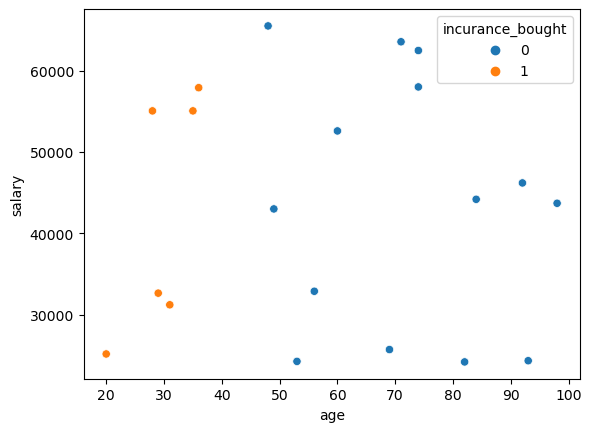

In [10]:
sns.scatterplot(x="age",y="salary",hue="incurance_bought",data=df)

In [11]:
df[df['age']==31]

,age,salary,incurance_bought
11,31,31241,1


In [12]:
df[df['age']==71]

,age,salary,incurance_bought
18,71,63548,0


In [13]:
## segrregate

In [14]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [15]:
##scaling
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [16]:
x.head()

,age,salary
0,29,32673
1,35,55061
2,84,44199
3,48,65496
4,49,43017


In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.15)

In [18]:
knn=KNeighborsClassifier()

In [19]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluate

In [20]:
y_pred=knn.predict(x_test)

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [22]:
y_pred_train=knn.predict(x_train)

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [23]:
accuracy_score(y_train,y_pred_train)

0.7647058823529411

In [24]:
knn=KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.3333333333333333

In [27]:
y_pred_train=knn.predict(x_train)
accuracy_score(y_train,y_pred_train)

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [28]:
knn.predict([[71,63547]])

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)

In [29]:
print(df['age'].mean())
print(df['age'].std())

59.1
24.22677944146236


In [30]:
(71-59.1)/24.22

0.4913294797687861

In [31]:
print(df['salary'].mean())
print(df['salary'].std())

43396.55
14793.549463675394


In [32]:
knn.predict([[0.49,1.36]])

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0], dtype=int64)

In [33]:
l=[1,3,5,7,9,11,13,15,17]
acc_test=[]
acc_train=[]
for i in l:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    ac_te=accuracy_score(y_test,y_pred)
    acc_test.append(ac_te)
    y_pred_train=knn.predict(x_train)
    ac_tr=accuracy_score(y_train,y_pred_train)
    acc_train.append(ac_tr)

C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ritik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [34]:
print(acc_test)
print(acc_train)

[0.3333333333333333, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]
[1.0, 0.7647058823529411, 0.7647058823529411, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765]


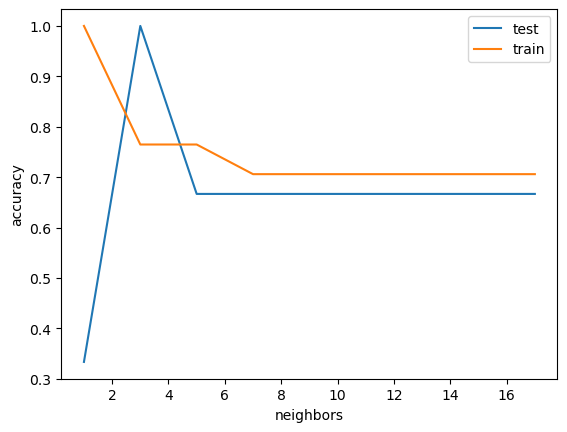

In [40]:
plt.plot(l,acc_test,label="test")
plt.plot(l,acc_train,label="train")
plt.legend()
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.show()